### Working with HDF5 Files
In this notebook we show how to load an HDF5 file and plot a single gather.

#### Setup

In [1]:
import matplotlib as mpl
mpl.rc("savefig", dpi=300)
mpl.rcParams['axes.linewidth'] = 0.5
mpl.rcParams['font.size'] = 7.5
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

#### Load HDF5 File

In [2]:
import h5py
f = h5py.File('seq024shot2102.h5', 'r')
f.items()

[(u'bad_ch', <HDF5 dataset "bad_ch": shape (54, 1), type "<u2">),
 (u'good_ch', <HDF5 dataset "good_ch": shape (186, 1), type "<u2">),
 (u'range', <HDF5 dataset "range": shape (240, 1), type "<f8">),
 (u'seq', <HDF5 dataset "seq": shape (1, 1), type "<u2">),
 (u'shot', <HDF5 dataset "shot": shape (1, 1), type "<u2">),
 (u'source_x', <HDF5 dataset "source_x": shape (1, 1), type "<f8">),
 (u'source_y', <HDF5 dataset "source_y": shape (1, 1), type "<f8">),
 (u'traces', <HDF5 dataset "traces": shape (240, 8192), type "<f4">)]

#### Plot Raw Traces

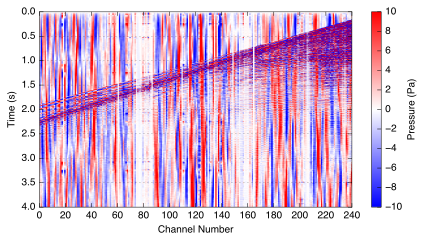

In [3]:
import numpy as np
import matplotlib.pyplot as plt
traces = f['traces'][:]
fs = 2000.0 # sample rate (Hz)
nsamp = traces.shape[1] # number of samples in each trace
fig = plt.figure(frameon = False, figsize=(7,3.5))
ax = plt.subplot()
im1 = plt.imshow(traces.transpose(), aspect='auto', vmin=-10, vmax=10, 
                 cmap='bwr', interpolation='nearest',
                 extent=[0, 240, nsamp/fs, 0])
plt.ylim([4, 0])
plt.xticks(np.arange(0,241,20))
ax.set_xlabel('Channel Number')
ax.set_ylabel('Time (s)')
cbar = plt.colorbar()
cbar.set_label('Pressure (Pa)')
for i in np.arange(0.5, 4, 0.5):
    plt.plot([0, 240], [i, i], color='black', linestyle=':', linewidth=0.25);

Colored contours of raw pressure values for shot 2102 of sequence (seismic line) 24. For this shot, the distance to the near group (channel 240) is 230.1 m, and the distance to the far group (channel 1) is 3208 m.